<center>


<div style="display: flex; justify-content: center;">
    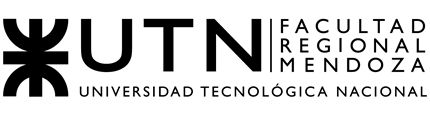
</div>
</center>
<center>
    <div style="font-family: 'Georgia', serif; font-size: 24px;">
        <p><strong>Ingeniería en Electrónica. Análisis de Señales y Sistemas</strong></p>
        </p>
                <!--<p><em>Profesor Mg. Ing. Javier Velez</em></p>-->
    </div>
</center>

# Trabajo Práctico $N^{\circ}2$: Análisis de Fourier

Celda a ejecutar para importar las librerías necesarias:

In [19]:
import sympy as sym
import numpy as np
import cmath
import matplotlib.pyplot as plt
from IPython.display import  Math

# 1.  Serie trigonométrica de Fourier

La serie trigonométrica de Fourier de una función **periódica** $f(t)$ se define como:

$$ f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} [a_n \cos(nw_0t) + b_n \sin(nw_0t)] \tag{1}$$

Donde $w_0$ es la frecuencia angular fundamental de la función $f(t)$, y los coeficientes $a_n$ y $b_n$ están definidos por:
$$ a_0 = \frac{2}{T} \int_{T} f(t)  dt$$
$$ a_n = \frac{2}{T} \int_{T} f(t) \cos(nw_0t) dt$$
$$ b_n = \frac{2}{T} \int_{T} f(t) \sin(nw_0t) dt$$

Aquí, $T$ es el período fundamental de la función $f(t)$, y los límites de integración son un período de la función.


## 1.1
Obtención de la serie trigonométrica con python

Supongamos una señal pulsante rectangular de amplitud $1$ con periodo $T=4s$ y ancho de pulso de $2s$.  

Matemáticamente, un período se describe como:

$f(t) =
\begin{cases}
0 & \text{si} -2 \leq t < -1 \\
1 & \text{si } -1 \leq t < 1 \\
0 & \text{si }  1 \leq t < 2 \\
\end{cases}$

Primero definiremos el símbolo `t` que representará nuestra variable tiempo.

In [43]:
t = sym.Symbol('t', real=True) # símbolo que representará el tiempo, que es una variable real

# Definimos el periodo fundamental y la frecuencia de la señal

T0  = 4

w0 = 2*sym.pi/T0 # sym.pi representa al número pi de manera simbólica


Utilizaremos la función `Piecewise()` de la librería `SymPy`  para representar la función sobre un período:

In [41]:
f = sym.Piecewise(
    (0, (t < -1) | (t > 1) ),
    (1, (t >= -1) & (t <= 1)),
)

La definimos sobre un período porque solo necesitamos integrar sobre un período para obtener los coeficientes de la serie trigonométrica de Fourier.

Ahora podemos graficar la función `f` usando `sym.plot()`

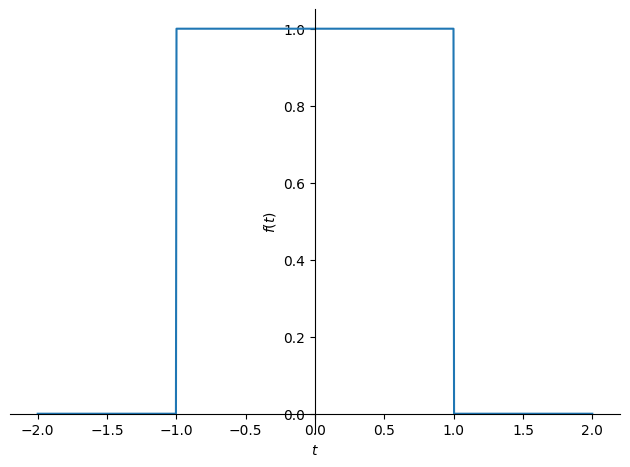

In [44]:
sym.plot(f, (t, -2, 2))

Procedemos entonces a calcular los coeficientes de la serie trigonométrica de Fourier.

Primero calcularemos los coeficientes $a_0$: $$ a_0 = \frac{2}{T} \int_{T} f(t)  dt = \frac{2}{T} \int_{-1}^{1} 1  dt $$



In [51]:
a0 =  (2/T0) * sym.integrate(1, (t, -1, 1))
display(a0)

1.00000000000000

Ahora calcularemos los coeficientes $a_n$: $$ a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos(nw_0t) dt$$

Para esto definiremos el índice de nuestra serie `n` como una variable simbólica entera positiva, ya que ya calculamos el $a_0$ y las sumatorias sobre senos y cosenos comienzan en 1.

In [55]:
# Primero definimos el índice discreto n como variable simbólica entera positiva.
n = sym.symbols('n', integer=True, positive=True)

# Luego definimos una variable que represente el argumento de la integral
arg_integral  = f * sym.cos(n * w0 * t)

# Ahora calculamos la integral
integral = sym.integrate(arg_integral,(t, -2, -2+T0))

# Por último multiplicamos pot (2/T0)
an = (2/T0) * integral

display(an)



2.0*sin(pi*n/2)/(pi*n)

Ahora utilizaremos el método `.subs(simbolo, valor)` para evaluar sobre los distintos n.

Definimos un número N de coeficientes $a_n$ que calcularemos:

In [62]:
N = 10
for k in range(1, N+1):
  # La función Math y display se utilizan para que se visualice en un formato más agradable (LaTEX)
    coef = an.subs(n, k).simplify()

    display(Math(f'a_{{{k}}}: {coef}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora calculemos los coeficientes $b_n$  $$ b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin(nw_0t) dt$$

In [65]:
# Definimos una variable que represente el argumento de la integral
arg_integral  = f * sym.sin(n * w0 * t)

# Ahora calculamos la integral
integral = sym.integrate(arg_integral,(t, -2, -2+T0))

# Por último multiplicamos por 2/T0
bn = (2/T0) * integral
bn = sym.simplify(bn)

bn


0

Vemos que todos los coeficientes $b_n$ son cero, lo que es esperable ya que la señal es par. Habiendo calculados los coeficientes $a_n$ y $b_n$ ya podemos expresar la serie con: $$ f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} [a_n \cos(nw_0t) + b_n \sin(nw_0t)]$$

$$ f(t) = \frac{1}{2} + \sum_{n=1}^{\infty} \frac{2 \sin(n \frac{\pi}{2})}{n\pi} \cos(n \frac{\pi}{2}t) = \frac{1}{2} + \sum_{n=1}^{\infty} \operatorname{sinc}(n \frac{\pi}{2})  \cos(n \frac{\pi}{2}t) $$

Hasta aquí utilizamos la definición de la serie trigonométrica de Fourier. Para simplificar el procedimiento `SymPy` tiene desarrollada el método `fourier_series()` que nos ahorrará este trabajo:

In [76]:
# Definimos el número de términos a visualizar
N = 5

# Utilizamos la función fourier_series
s = sym.fourier_series(f, (t, -2, -2+T0))


El primer parámetro es la expresión sobre la cual queremos calcular la serie de Fourier, y el segundo parámetro es una tupla que contiene la variabla sobre la cual la calcularemos y el intervalo de la funcíon que representa el preríodo a analizar.

La serie de Fourier calculada de esta manera nos permite utilizar el método `.truncate(N)` que nos permite definir la cantidad de terminos a truncar.

In [77]:
# Definimos la cantidad de términos a utilizar
N=5
s.truncate(n=N)

2*cos(pi*t/2)/pi - 2*cos(3*pi*t/2)/(3*pi) + 2*cos(5*pi*t/2)/(5*pi) - 2*cos(7*pi*t/2)/(7*pi) + 1/2

Ahora graficaremos los resultados de la serie variando la cantidad de términos utilizados:

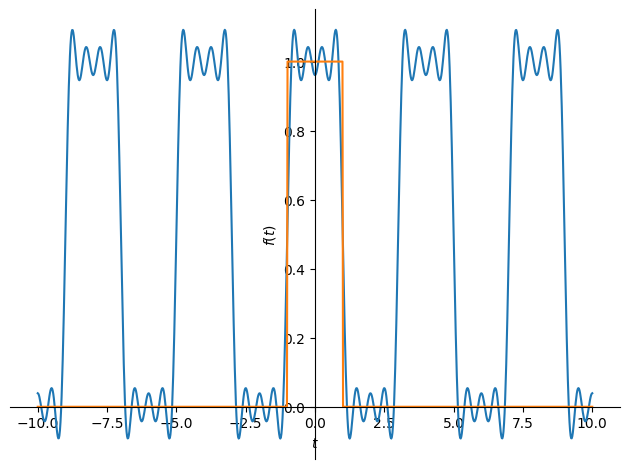

In [74]:
# Definimos la cantidad de términos a utilizar
N=4

# Graficamos la serie truncada en N términos y un
# periodo de la función  parapoder comparar
sym.plot(s.truncate(n=N), f)

Podemos graficar las componentes por separado:

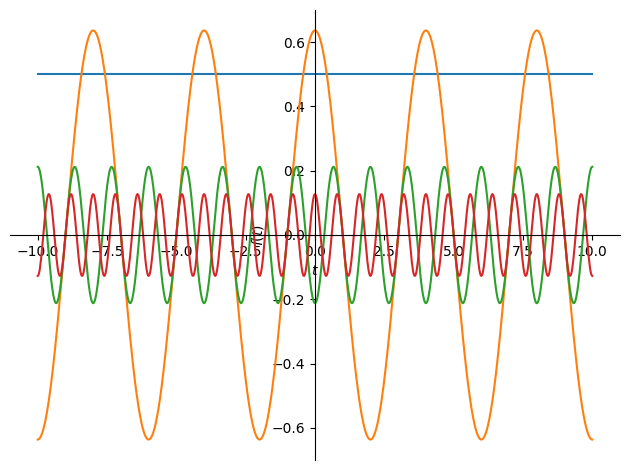

In [80]:
N=4
s_truncada = s.truncate(n=N)

#Convertimos las la serie en una lista de expresiones (términos de la SF)
s_truncada_list = [s_truncada.args[i] for i in range(len(s_tr.args))]


sym.plot(*s_truncada_list) #El * sirve para desempaqueta la lista.

Podemos ver en la imagen, los diferentes armónicos con sus respectivas amplitudes y desfasajes que componen a la señal periódica. Identidicar qué número de armónico se corresponde con cada una de las curvas.


Notar que este desarrollo es equivalente al ejercicio $5a$ de gabinete (TP7) para $T=4$ y $\tau = 2$. Comparar los resultados.

## Ejercicio 1

Resolver el ejercicio $5e$ del trabajo práctico de gabinete utilizando ambas metodologías vistas en el ejercicio 1, por definición y utilizando la función `sym.fourier_series()`.
$$x(t)=
\begin{cases}
t, & 0 \leq t<1, \\
2-t, & 1 \leq t<2,
\end{cases}$$

siendo $T=2.$

Analizar los resultados respecto a la paridad de la señal y dejarlos por escrito en el notebook.

# 2. Serie exponencial compleja de Fourier.

La serie exponencial compleja se expresa como:

$$f(t)=\sum_{n=-\infty}^{\infty} c_n e^{jn\omega_0 t}$$

Donde calcularemos:

$$c_0=\frac{1}{T}\int_{T} f(t)dt$$

$$c_n = \frac{1}{T}\int_{T} f(t) e^{-jn\omega_0 t}dt \ \ \text{ para } \ \ n \neq 0 $$


Analizaremos cómo obtener la serie exponencial de Fourier de la señal presentada en el ejercicio $6a$ del práctico de gabinete.

El período central de la señal se defie como:

$$x(t)=
\begin{cases}
1, & -\frac{1}{4} \lt t\leq \frac{1}{4}, \\
0, &   t\lt -\frac{1}{4} \ \lor  \ t\gt \frac{1}{4}
\end{cases}$$

$$T=1$$
No existe función en `SymPy` para calcular la serie exponencial  directamente, se debe realizar de manera analítica. Para esto debemos tener en cuenta que la forma de expresar la exponencial compleja $e^i$  en sympy es `sym.exp(sym.I)`

In [ ]:
sym.exp(sym.I)

exp(I)

Primero obtendremos la expresión de la señal para un período:

In [125]:
# Definimos el periodo fundamental y la frecuencia de la señal
T0  = 1
w0 = 2*sym.pi/T0 # sym.pi representa al número pi de manera simbólica

# Creamos la función
f = sym.Piecewise(
    (0, (t < -0.25) | (t > 0.25)),
    (1, (t >= -0.25) & (t <= 0.25))
)

f

Piecewise((0, (t > 0.25) | (t < -0.25)), (1, (t >= -0.25) & (t <= 0.25)))

Graficamos el período que utilizaremos de la señal.

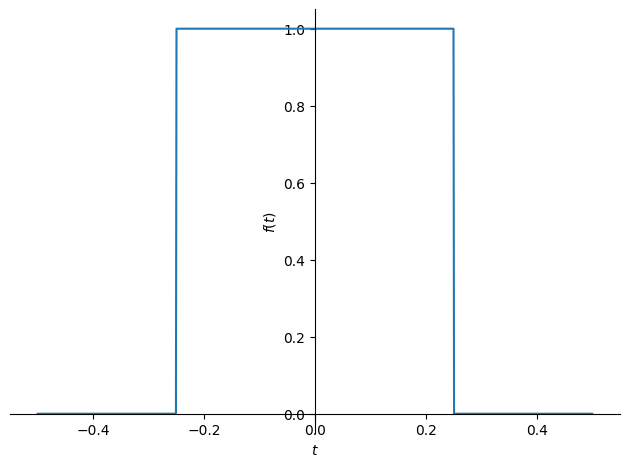

In [103]:
sym.plot(f, (t, -0.5, 0.5))

Calcularemos ahora los coeficientes $C_n=\frac{1}{T}\int_{T} x(t) e^{-inw_0t} dt$

In [126]:
# Primero definimos el índice discreto n como variable simbólica
n = sym.symbols('n', integer=True)

# Luego definimos una variable que represente el argumento de la integral
arg_integral  = f * sym.exp(-sym.I * n * w0 * t)

# Ahora calculamos la integral en un período
integral = sym.integrate(arg_integral,(t,-0.5, -0.5+T0))

# Por último multiplicamos por (1/T0)
cn = (1/T0) * integral
cn

1.0*Piecewise((-I*exp(0.5*I*pi*n)/(2*pi*n) + I*exp(-0.5*I*pi*n)/(2*pi*n), Ne(n, 0)), (0.5, True))

Vemos que quedó expresado en forma compleja. Convirtiendo las exponenciales a suma de senos y cosenos mediante la identidad de Euler podemos encontrar una expresión más simple.

In [129]:
cn=cn.rewrite(sym.cos).simplify()

Hacer esto no es necesario pero puede ser útil para visualizar las expresiones de manera más sensilla.


La serie queda expresada como:

$$f(t)= 0.5 + \sum_{n=-\infty}^{-1} \frac{1}{2} \operatorname{sinc}(n \frac{\pi}{2}) e^{jn 2\pi t} + \sum_{n=1}^{\infty} \frac{1}{2} \operatorname{sinc}(n \frac{\pi}{2}) e^{j n 2\pi t}$$



Ahora encontraremos el valor de algunos de los coeficientes $c_n$ usando la función :

In [131]:
N=10
# Presentamos resultados por pantalla
for k in range(-N, N): #usamos k porque n ya lo estamos usando como variable simbólica
  #display(Math(f'C_{{{k}}}: {cn.subs(n, k).evalf()}'))
  print(f"c_{k}: ", cn.subs(n, k).evalf())

c_-10:  0
c_-9:  0.0353677651315323
c_-8:  0
c_-7:  -0.0454728408833987
c_-6:  0
c_-5:  0.0636619772367581
c_-4:  0
c_-3:  -0.106103295394597
c_-2:  0
c_-1:  0.318309886183791
c_0:  0.500000000000000
c_1:  0.318309886183791
c_2:  0
c_3:  -0.106103295394597
c_4:  0
c_5:  0.0636619772367581
c_6:  0
c_7:  -0.0454728408833987
c_8:  0
c_9:  0.0353677651315323


Graficaremos ahora el espectro de amplitud, para esto calcularemos el módulo de  los coeficientes calculados en el paso anterior y lo guardaremos en la lista que llamaremos `amp`

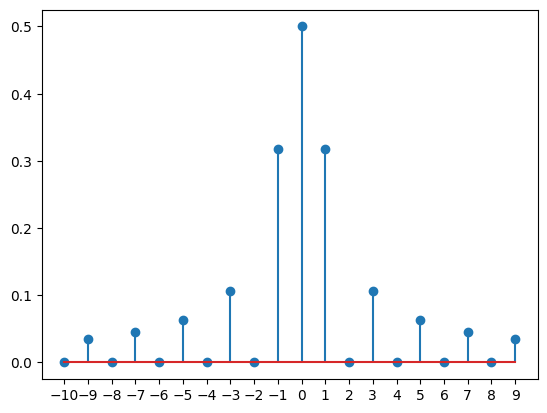

In [122]:
amp = []
k = range(-N, N) #usamos k porque n ya lo estamos usando como variable simbólica
for i in k:
  amp.append(abs(cn.subs(n, i).evalf()))


plt.stem(k, amp)
_ = plt.xticks(np.arange(np.min(k), np.max(k)+1, 1))

Espectro de fase:

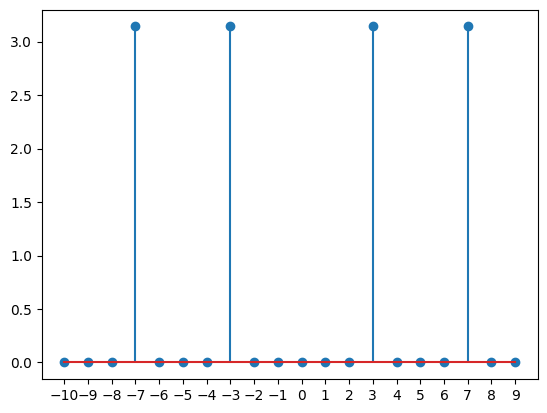

In [136]:
fase = []
k = range(-N, N)


for i in k:
    fase.append(cmath.phase(cn.subs(n, i).evalf()))


plt.stem(k, fase)
_=plt.xticks(np.arange(np.min(k), np.max(k)+1, 1)) #para mejorar la visualización

## Ejercicio 2

Resolver el ejercicio $6b$ del práctico de gabinete.

# 3. Transformada de Fourier de tiempo continuo


La Transformada de Fourier es una herramienta que nos permite representar señales en el dominio de la frecuencia. Esta representación es especialmente útil porque muchas veces es más sencillo analizar y manipular señales en el dominio de la frecuencia que en el dominio del tiempo. La Transformada de Fourier es aplicable tanto a señales continuas como discretas, aunque la formulación matemática varía ligeramente.

La Transformada de Fourier de una señal $ x(t) $ se denota por $ X(f) $ o $ X(j\omega) $, donde $ f $ es la frecuencia en Hertz y $ \omega=2\pi f $ es la frecuencia angular en $rad/s$.

La definición matemática de la Transformada de Fourier es:

$
X(j\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt
$

y su transformada inversa es:

$
x(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} X(j\omega) e^{j\omega t} df
$

A continuación, veremos cómo calcular la Transformada de Fourier utilizando Sympy y algunas de sus propiedades más importantes.




Vamos a calcular la Transformada de Fourier de un pulso rectangular definido como:

$x(t) =
\begin{cases}
0 & \text{si } t < -0.5 \\
1 & \text{si } -0.5 \leq t \leq 0.5 \\
0 & \text{si } t > 0.5
\end{cases}
$

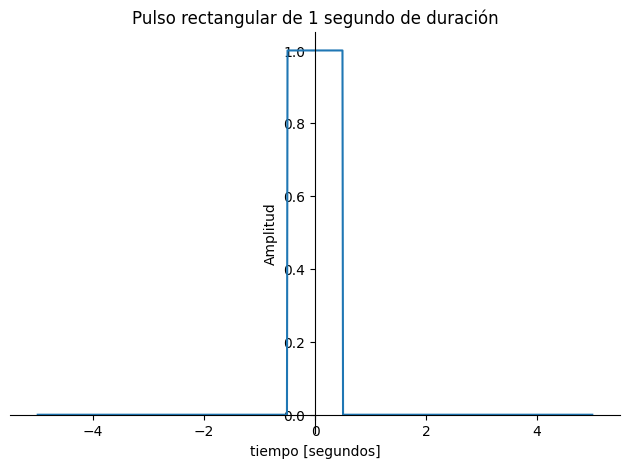

In [140]:
# Definimos la variables simbólicas
t, f = sym.symbols('t f') # usaremos frecuencia en Hertz ya que la implementación en sympy usa f

# Definimos la señal pulso rectangular
pulso_rectangular = sym.Piecewise(
    (1, (t >= -0.5) & (t <= 0.5)),
    (0, (t < -0.5) | (t > 0.5))
)


sym.plot(pulso_rectangular, (t, -5,5) ,title='Pulso rectangular de 1 segundo de duración', ylabel='Amplitud', xlabel='tiempo [segundos]')

Usaremos frecuencia en Hertz ya que es la que utiliza la implementación de la transformada en sympy.



Para calcular la transformada de Fourier utilizaremos la función integrada en `SymPy` llamada `fourier_transform` la cual recibe como argumentos:
1.  la señal a la cual le queremos calcular la transformada de Fourier
2. la variable simbólica que se usa para el tiempo
3. la variable simbólica que usaremos para la frecuencia en Hertz

In [141]:
pulso_rectangular_transformado = sym.fourier_transform(pulso_rectangular, t, f)

Para graficar el espectro de amplitud usaremos la función de sympy `sym.Abs` que calcula el módulo de la transformada

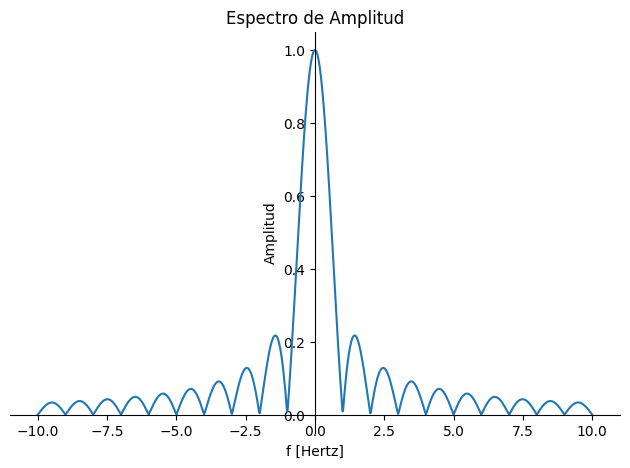

In [144]:
_ = sym.plot(sym.Abs(pulso_rectangular_transformado), title='Espectro de Amplitud', ylabel='Amplitud', xlabel='f [Hertz]')

Para graficar el espectro de fase usaremos la función de sympy `sym.arg`, la cual nos devuelve la fase de la transformadal

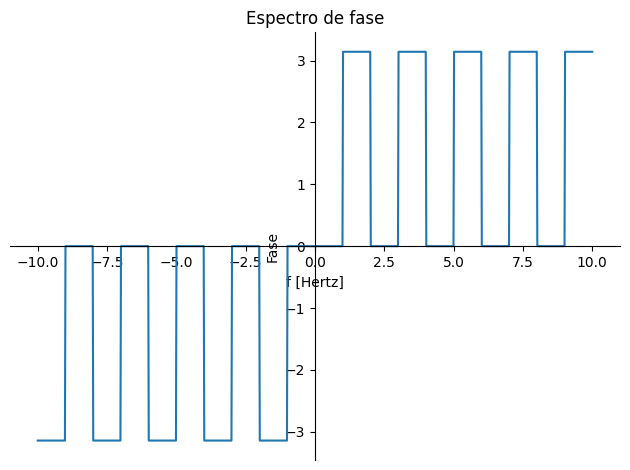

In [143]:
_ = sym.plot(sym.arg(pulso_rectangular_transformado), title='Espectro de fase', ylabel='Fase', xlabel='f [Hertz]')

## Ejercicio 3

a. Calcular el espectro de fase y amplitud de la misma señal del ejercicio anterior con un retraso de 0.2 segundos.

b. Compare los espectros de amplitud y fase obtenidos con los del ejercicio anterior.

c. ¿Cómo explica las diferencias?

## Ejercicio 4

Grafique los espectros de amplitud y fase de la rampa finita que vale `t` entre `-0.7` y `0.7` y vale 0 en cualquier otro valor de t.

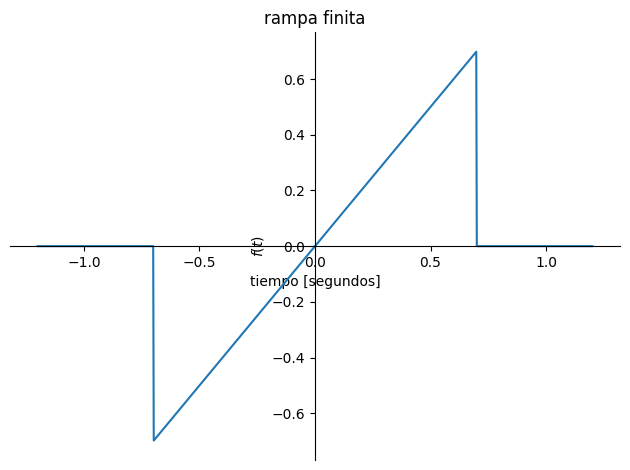

In [146]:
import sympy as sym
# Definimos la variables simbólicas
t, f = sym.symbols('t f') # usaremos frecuencia en Hertz ya que es la implementación en sympy

# Definimos rectangular signal
rampa = sym.Piecewise(
    (t, (t >= -0.7) & (t <= 0.7)),
    (0, (t < -0.7) | (t > 0.7))
)
_ = sym.plot(rampa, (t, -1.2, 1.2) , title='rampa finita', xlabel='tiempo [segundos]')